# TLC data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.options.mode.chained_assignment = None

In [2]:
df_yellow = pd.read_parquet('../data/tlc_data/yellow')
print(df_yellow.shape)
df_yellow.head()

(43575472, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [3]:
# tpep_pickup_datetime tpep_dropoff_datetime trip_distance PULocationID DOLocationID payment_type fare_amount tip_amount
yellow_sub_df = df_yellow[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','PULocationID','DOLocationID',\
             'total_amount']] 
yellow_sub_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,132,165,51.95
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,138,132,36.35
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36


In [4]:
yellow_sub_df.to_parquet('../data/processed_data/yellow_selected_data.parquet', compression='gzip')

In [19]:
df=pd.read_parquet('../data/processed_data/yellow_selected_data.parquet')
df.shape

(43575472, 6)

In [20]:
df.isnull().sum() # check missing value

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
PULocationID             0
DOLocationID             0
total_amount             0
dtype: int64

In [21]:
df.describe()

,trip_distance,PULocationID,DOLocationID,total_amount
count,4.357547e+07,4.357547e+07,4.357547e+07,4.357547e+07
mean,6.561586e+00,1.650239e+02,1.625722e+02,1.985105e+01
std,6.670614e+02,6.612380e+01,7.067538e+01,1.629165e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,-2.567800e+03
25%,1.100000e+00,1.320000e+02,1.130000e+02,1.176000e+01
50%,1.810000e+00,1.620000e+02,1.620000e+02,1.530000e+01
75%,3.300000e+00,2.340000e+02,2.340000e+02,2.130000e+01
max,3.516134e+05,2.650000e+02,2.650000e+02,8.182867e+05


In [22]:
# trip_distance
df = df[df.trip_distance > 0]
df.shape

(43023587, 6)

In [23]:
# PULocationID
df = df[(df.trip_distance >= 1)&(df.trip_distance <= 263)]
df.shape

(34446306, 6)

In [24]:
# PULocationID
df = df[(df.total_amount > 0)]
df.shape

(34362856, 6)

In [25]:
df['minutes'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).to_numpy().astype('timedelta64[s]').astype(int)/60

In [26]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,132,165,51.95,27.600000
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,138,132,36.35,15.216667
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667


In [27]:
df['income_rate'] = (df['total_amount'] )/df['minutes']
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,132,165,51.95,27.600000,1.882246
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,138,132,36.35,15.216667,2.388828
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073


In [28]:
# Hour of day
df['hour_of_day'] = df.tpep_pickup_datetime.dt.hour

In [29]:
# Day of Week
df['day_of_week'] = df.tpep_pickup_datetime.dt.day_of_week

In [30]:
# Day of Week
df['day_of_month'] = df.tpep_pickup_datetime.dt.month

In [31]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801,0,4,1
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,132,165,51.95,27.600000,1.882246,0,4,1
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,138,132,36.35,15.216667,2.388828,0,4,1
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387,0,4,1
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073,0,4,1


In [32]:
df[['minutes', 'income_rate']].describe()

,minutes,income_rate
count,3.436286e+07,3.436286e+07
mean,1.893167e+01,inf
std,6.706795e+01,NaN
min,-1.350846e+05,-5.700000e+03
25%,9.083333e+00,1.132616e+00
50%,1.328333e+01,1.357627e+00
75%,2.010000e+01,1.657040e+00
max,2.933652e+04,inf


In [33]:
df = df[(df.minutes > 0) & (df.minutes < 24*60) & (df.income_rate < 10)&(df.income_rate > 0)]

In [34]:
df[['minutes', 'income_rate']].describe()

,minutes,income_rate
count,3.426944e+07,3.426944e+07
mean,1.898014e+01,1.444254e+00
std,5.824612e+01,4.693076e-01
min,5.000000e-02,7.926024e-04
25%,9.116667e+00,1.133030e+00
50%,1.330000e+01,1.357452e+00
75%,2.013333e+01,1.655786e+00
max,1.439983e+03,9.993976e+00


In [35]:
df.shape

(34269443, 11)

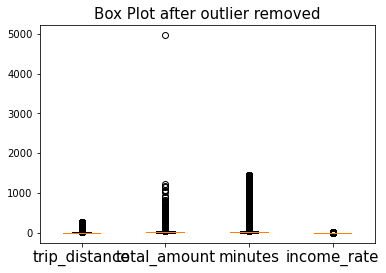

In [36]:
cols = ['trip_distance', 'total_amount','minutes','income_rate']
# show the tips after remove outliers
fig, ax = plt.subplots()
ax.boxplot(df[cols])
ax.set_xticklabels(cols, fontsize=15)
plt.title('Box Plot after outlier removed',fontsize=15)
# fig.savefig("Box Plot after outlier removed.png")
plt.show()

#### Remove Outliers


In [37]:
# IQR = 0.75quantile - 0.25quantile
Q0 = df[cols].quantile(0.05)
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
Q4 = df[cols].quantile(0.95)
IQR = Q3 - Q1
print("Q0: ", Q0)
print("Q1: ", Q1)
print("Q3: ", Q3)
print("Q4: ", Q4)
print("IQR: ", IQR)


Q0:  trip_distance     1.100000
total_amount     10.800000
minutes           5.650000
income_rate       0.893058
Name: 0.05, dtype: float64
Q1:  trip_distance     1.500000
total_amount     13.560000
minutes           9.116667
income_rate       1.133030
Name: 0.25, dtype: float64
Q3:  trip_distance     4.000000
total_amount     23.510000
minutes          20.133333
income_rate       1.655786
Name: 0.75, dtype: float64
Q4:  trip_distance    14.460000
total_amount     57.100000
minutes          39.866667
income_rate       2.289720
Name: 0.95, dtype: float64
IQR:  trip_distance     2.500000
total_amount      9.950000
minutes          11.016667
income_rate       0.522756
dtype: float64


In [38]:
removed_df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
removed_df.shape

(28819719, 11)

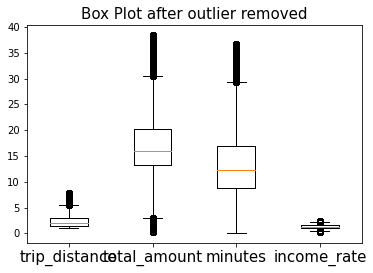

In [39]:
# show the tips after remove outliers
fig, ax = plt.subplots()
ax.boxplot(removed_df[cols])
ax.set_xticklabels(cols, fontsize=15)
plt.title('Box Plot after outlier removed',fontsize=15)
# fig.savefig("Box Plot after outlier removed.png")
plt.show()

In [40]:
removed_df.describe()

,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month
count,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07,2.881972e+07
mean,2.487619e+00,1.656721e+02,1.629862e+02,1.726190e+01,1.358291e+01,1.383974e+00,1.425060e+01,2.988935e+00,6.016006e+00
std,1.394902e+00,6.680671e+01,7.061833e+01,5.396623e+00,6.220140e+00,3.448373e-01,5.515140e+00,1.911746e+00,3.510369e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e-01,1.333333e-01,3.489449e-01,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.470000e+00,1.140000e+02,1.120000e+02,1.330000e+01,8.833333e+00,1.126531e+00,1.100000e+01,1.000000e+00,3.000000e+00
50%,2.050000e+00,1.620000e+02,1.620000e+02,1.596000e+01,1.223333e+01,1.331661e+00,1.500000e+01,3.000000e+00,5.000000e+00
75%,3.080000e+00,2.340000e+02,2.340000e+02,2.016000e+01,1.701667e+01,1.591710e+00,1.800000e+01,5.000000e+00,9.000000e+00
max,7.750000e+00,2.650000e+02,2.650000e+02,3.843000e+01,3.665000e+01,2.439917e+00,2.300000e+01,6.000000e+00,1.200000e+01


In [41]:
removed_df.to_parquet('../data/processed_data/yellow_data.parquet', compression='gzip')

# Weather data

In [1]:
import pandas as pd
import numpy as np

In [25]:
weather_2021_df = pd.read_csv('../data/weather/2021.csv')
print("weather_df 2021 shape ",weather_2021_df.shape)
weather_2022_df = pd.read_csv('../data/weather/2022.csv')
print("weather_df 2022 shape ",weather_2022_df.shape)
weather_df=pd.concat([weather_2021_df,weather_2022_df])
print("weather_df 2021&2022 shape ",weather_df.shape)
weather_df.head()

weather_df 2021 shape  (13229, 100)
weather_df 2022 shape  (8440, 100)
weather_df 2021&2022 shape  (21669, 102)


/tmp/ipykernel_18988/2801569551.py:1: DtypeWarning: Columns (36,43,44,45,46,50,58) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_2021_df = pd.read_csv('../data/weather/2021.csv')
/tmp/ipykernel_18988/2801569551.py:3: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,37,41,42,43,44,47,48,51,52,53,55,56,57,58,70,71,72,73,74,75,76,77,78,79,82,84,85,86,88,89,95,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_2022_df = pd.read_csv('../data/weather/2022.csv')


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OE1,OE2,OE3,RH1,RH2,RH3,REM,EQD,AW5,MW3
0,74486094789,2021-01-01T00:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08074486 32566 83212 10050 21028 30249 4026...,NaN,NaN,NaN
1,74486094789,2021-01-01T00:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET10612/31/20 19:51:03 METAR KJFK 010051Z 320...,NaN,NaN,NaN
2,74486094789,2021-01-01T01:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET10612/31/20 20:51:03 METAR KJFK 010151Z 350...,D01 0ADE726,NaN,NaN
3,74486094789,2021-01-01T02:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET11212/31/20 21:51:03 METAR KJFK 010251Z 340...,D01 0ADE726,NaN,NaN
4,74486094789,2021-01-01T03:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN06474486 32966 23407 10022 21044 30276 4028...,NaN,NaN,NaN


In [46]:
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE'])
sub_weather_df  = weather_df [(weather_df.QUALITY_CONTROL =='V030')&(weather_df.DATA_TIME <'2022-05-01 00:00:00') ]
sub_weather_df.shape

(13892, 104)

In [47]:
sub_weather_df.tail()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OE3,RH1,RH2,RH3,REM,EQD,AW5,MW3,DATA_TIME,DATE_TIME
4466,74486094789,2022-04-30T20:29:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,MET10004/30/22 15:29:02 SPECI KJFK 302029Z 180...,NaN,NaN,NaN,2022-04-30 20:29:00,2022-04-30 20:29:00
4467,74486094789,2022-04-30T20:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET11204/30/22 15:51:02 METAR KJFK 302051Z 190...,NaN,NaN,NaN,2022-04-30 20:51:00,2022-04-30 20:51:00
4469,74486094789,2022-04-30T21:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET09504/30/22 16:51:02 METAR KJFK 302151Z 190...,NaN,NaN,NaN,2022-04-30 21:51:00,2022-04-30 21:51:00
4470,74486094789,2022-04-30T22:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET09804/30/22 17:51:02 METAR KJFK 302251Z 190...,D01 0ADE726,NaN,NaN,2022-04-30 22:51:00,2022-04-30 22:51:00
4471,74486094789,2022-04-30T23:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET11604/30/22 18:51:02 METAR KJFK 302351Z 190...,D01 0ADE726,NaN,NaN,2022-04-30 23:51:00,2022-04-30 23:51:00


In [5]:
# converting code for weather data. 
# reference link: https://github.com/msw17002/msw17002-Integrated-Surface-Dataset-Extraction-for-Small-Domains/
WS_TH = 2*0.514444
# The minimum gust speed reported by ASOS is 14 knots.
WG_TH = 14*0.514444
def Temperature_Delim_Calc_C(Temperature_Cell): #TEMPERATURE
    T2_C = np.nan
    if len(Temperature_Cell["TMP"])>0: # SFC TEMPERATURE
        Temp_Obs = Temperature_Cell["TMP"].split(',')
        if Temp_Obs[1] == '0' or Temp_Obs[1] == '1' or Temp_Obs[1] == '4' or Temp_Obs[1] == '5' \
        or Temp_Obs[1] == '9' or Temp_Obs[1].isalpha():
            T2_C = float(Temp_Obs[0])/10 #celsius
            if T2_C > 100:
                T2_C = np.nan
    return (T2_C)

def DewPoint_Delim_Calc_C(DewPoint_Cell): #DEW POINT TEMPERATURE
    DP2_C = np.nan
    if len(DewPoint_Cell["DEW"])>0:
        DP_Obs = DewPoint_Cell["DEW"].split(',')
        if DP_Obs[1] == '0' or DP_Obs[1] == '1' or DP_Obs[1] == '4' or DP_Obs[1] == '5' \
        or DP_Obs[1] == '9' or DP_Obs[1].isalpha():
            DP2_C = float(DP_Obs[0])/10
            if DP2_C > 100:
                DP2_C = np.nan
    return (DP2_C)

def WindGust_Delim_Calc_ms(WindGust_Cell): #WIND GUST
    WG_ms = np.nan
    if len(WindGust_Cell["OC1"])>0: 
        WG_Obs = WindGust_Cell["OC1"].split(',')
        if WG_Obs[1] == '0' or WG_Obs[1] == '1' or WG_Obs[1] == '4' or WG_Obs[1] == '5' \
        or WG_Obs[1] == '9' or WG_Obs[1].isalpha():
            WG_ms = float(WG_Obs[0])/10 #celsius
            if WG_ms > 100:
                WG_ms = np.nan
            elif WG_ms<WG_TH:
                WG_ms = np.nan
    return (WG_ms)

def WindSp_WindDir_Calc_ms_deg(Wind_Cell): #WIND SPEED | WIND DIRECTION
    wsms_wddeg = np.nan,np.nan
    if len(Wind_Cell["WND"])>0:
        Wind_Obs = Wind_Cell["WND"].split(',')
        if Wind_Obs[1] == '0' or Wind_Obs[1] == '1' or Wind_Obs[1] == '4' or Wind_Obs[1] == '5' \
        or Wind_Obs[1] == '9' or Wind_Obs[1].isalpha():
            if Wind_Obs[2] == "N":
                wsms_wddeg = float(Wind_Obs[3])/10,float(Wind_Obs[0]) #degrees 
            elif Wind_Obs[2] == "C" or Wind_Obs[2] == '9':
                wsms_wddeg = np.nan,np.nan
        if wsms_wddeg[0]<WS_TH:
            wsms_wddeg = np.nan,np.nan
        elif wsms_wddeg[0]>100:
            wsms_wddeg = np.nan,np.nan
        elif wsms_wddeg[1]>361:
            wsms_wddeg = np.nan,np.nan
    return (wsms_wddeg) 

def StationPres_Alt_Calc_hpa(Pressure_Cell): #STATION PRESSURE
    SP_hpa = np.nan
    if len(Pressure_Cell["MA1"])>0:
        Pressure = Pressure_Cell["MA1"].split(',')
        if Pressure[3] == '0' or Pressure[3] == '1' or Pressure[3] == '4' or Pressure[3] == '5' \
        or Pressure[3] == '9' or Pressure[3].isalpha():
            SP_hpa = (float(Pressure[2])/10)*100 
            if SP_hpa > 200000:
                SP_hpa = np.nan
    return (SP_hpa)  

In [51]:
converted_weather_df=pd.DataFrame(columns=['DATE_TIME','TEMPERATURE','Dew_Point',"Wind_Direction","Wind_Speed"])
for i in range(len(sub_weather_df)):
                    # metadata for the observations that match the query time
    QCLCD_tm      = sub_weather_df.iloc[i,:]
    Date_Obs      = QCLCD_tm["DATE_TIME"]
    T2_C          = Temperature_Delim_Calc_C(QCLCD_tm)                    #2-M TEMPERATURE celsius
    Td_C          = DewPoint_Delim_Calc_C(QCLCD_tm)                       #2-M DEW POINT TEMPERATURE celsius
    (WSms,WDdeg)  = WindSp_WindDir_Calc_ms_deg(QCLCD_tm)                  #WIND DIRECTION degrees | WIND SPEED m/s
    # SP_hpa        = StationPres_Alt_Calc_hpa(QCLCD_tm)                    #STATION PRESSURE hpa
    converted_weather_df.loc[len(converted_weather_df.index)]=[Date_Obs,T2_C,Td_C,WDdeg,WSms]

In [50]:
converted_weather_df.head()

,DATE,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6


In [52]:
converted_weather_df.to_csv('../data/weather/preprocessed_weather.csv')

In [25]:
df=pd.read_csv('../data/weather/preprocessed_weather.csv',index_col=0)
df.head(20)

,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6
5,2021-01-01 04:59:00,NaN,NaN,NaN,NaN
6,2021-01-01 04:59:00,NaN,NaN,NaN,NaN
7,2021-01-01 05:51:00,0.6,-4.4,350.0,3.1
8,2021-01-01 06:51:00,0.6,-3.9,360.0,2.6
9,2021-01-01 07:51:00,0.0,-3.9,360.0,3.6


In [26]:
df.shape

(13892, 5)

In [27]:
df.isnull().sum() # check missing value

DATE_TIME            0
TEMPERATURE        502
Dew_Point          507
Wind_Direction    1059
Wind_Speed        1059
dtype: int64

In [29]:
df=df.dropna(thresh=3) # keeping the row having 3 cols valid value
df.shape

(13391, 5)

In [30]:
df.head(20)

,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6
7,2021-01-01 05:51:00,0.6,-4.4,350.0,3.1
8,2021-01-01 06:51:00,0.6,-3.9,360.0,2.6
9,2021-01-01 07:51:00,0.0,-3.9,360.0,3.6
10,2021-01-01 08:51:00,0.6,-3.9,360.0,2.1
11,2021-01-01 09:51:00,0.0,-4.4,360.0,2.6


In [32]:
interpolated_df=df.interpolate() # linear interpolation
interpolated_df.head(20)

,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.70
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.60
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.60
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.10
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.60
7,2021-01-01 05:51:00,0.6,-4.4,350.0,3.10
8,2021-01-01 06:51:00,0.6,-3.9,360.0,2.60
9,2021-01-01 07:51:00,0.0,-3.9,360.0,3.60
10,2021-01-01 08:51:00,0.6,-3.9,360.0,2.10
11,2021-01-01 09:51:00,0.0,-4.4,360.0,2.60


In [33]:
interpolated_df.to_csv('../data/weather/interpolated_weather.csv')

# Merge Data

In [1]:
import pandas as pd

In [2]:
yellow_tlc_data=pd.read_parquet('../data/processed_data/yellow_data.parquet')
yellow_tlc_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801,0,4,1
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387,0,4,1
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073,0,4,1
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,17.30,17.000000,1.017647,0,4,1
7,2021-01-01 00:12:29,2021-01-01 00:30:34,5.70,90,40,21.80,18.083333,1.205530,0,4,1


In [3]:
yellow_tlc_data["YEAR_MONTH_DAY_HOUR"]=yellow_tlc_data["tpep_pickup_datetime"].dt.strftime('%Y%m%d%H')
yellow_tlc_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month,YEAR_MONTH_DAY_HOUR
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801,0,4,1,2021010100
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387,0,4,1,2021010100
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073,0,4,1,2021010100
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,17.30,17.000000,1.017647,0,4,1,2021010100
7,2021-01-01 00:12:29,2021-01-01 00:30:34,5.70,90,40,21.80,18.083333,1.205530,0,4,1,2021010100


In [4]:
weather_data=pd.read_csv('../data/weather/interpolated_weather.csv',index_col=0)
weather_data["DATE_TIME"]=pd.to_datetime(weather_data["DATE_TIME"])
weather_data.head()

,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6


In [5]:
weather_data["YEAR_MONTH_DAY_HOUR"]=weather_data["DATE_TIME"].dt.strftime('%Y%m%d%H')
weather_data.head()

,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed,YEAR_MONTH_DAY_HOUR
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7,2021010100
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6,2021010101
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6,2021010102
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1,2021010103
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6,2021010104


In [6]:
print(yellow_tlc_data.shape,weather_data.shape)
yellow_tlc_data=yellow_tlc_data.drop_duplicates(keep='first') # drop duplicates data
weather_data=weather_data.drop_duplicates(subset=['YEAR_MONTH_DAY_HOUR'],keep='first')
print(yellow_tlc_data.shape,weather_data.shape)

(28819719, 12) (13391, 6)
(28819716, 12) (11639, 6)


In [7]:
merge_data=pd.merge(yellow_tlc_data,weather_data,on='YEAR_MONTH_DAY_HOUR',how="inner")

In [8]:
merge_data.shape

(28819501, 17)

In [9]:
merge_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month,YEAR_MONTH_DAY_HOUR,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
2,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
3,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,17.30,17.000000,1.017647,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
4,2021-01-01 00:12:29,2021-01-01 00:30:34,5.70,90,40,21.80,18.083333,1.205530,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7


In [10]:
merge_data.to_parquet('../data/processed_data/merge_data.parquet', compression='gzip')

# Anaylsis& Aggregation

In [1]:
import pandas as pd

In [2]:
merge_data=pd.read_parquet('../data/processed_data/merge_data.parquet')

In [3]:
merge_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,minutes,income_rate,hour_of_day,day_of_week,day_of_month,YEAR_MONTH_DAY_HOUR,DATE_TIME,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,11.80,6.033333,1.955801,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,24.36,16.533333,1.473387,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
2,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,14.15,8.016667,1.765073,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
3,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,17.30,17.000000,1.017647,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
4,2021-01-01 00:12:29,2021-01-01 00:30:34,5.70,90,40,21.80,18.083333,1.205530,0,4,1,2021010100,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7


In [4]:
merge_data.shape

(28819501, 17)

In [18]:
def agg_method(x):
    d={}
    d['pick_ups']=x['tpep_pickup_datetime'].count()
    d['mean_amount']=x['total_amount'].mean()
    d['mean_income_rate']=x['income_rate'].mean()
    return pd.Series(d)

In [19]:
aggregation_data=merge_data.groupby(['YEAR_MONTH_DAY_HOUR','PULocationID','TEMPERATURE','Dew_Point','Wind_Direction','Wind_Speed','hour_of_day','day_of_week','day_of_month']).apply(agg_method)

In [20]:
aggregation_data.shape

(941309, 3)

In [21]:
aggregation_data.head()

pick_ups  \
YEAR_MONTH_DAY_HOUR PULocationID TEMPERATURE Dew_Point Wind_Direction Wind_Speed hour_of_day day_of_week day_of_month             
2021010100          4            4.4         -3.3      320.0          6.7        0           4           1                  3.0   
                    7            4.4         -3.3      320.0          6.7        0           4           1                  1.0   
                    13           4.4         -3.3      320.0          6.7        0           4           1                  2.0   
                    17           4.4         -3.3      320.0          6.7        0           4           1                  2.0   
                    24           4.4         -3.3      320.0          6.7        0           4           1                  6.0   

                                                                                                                       mean_amount  \
YEAR_MONTH_DAY_HOUR PULocationID TEMPERATURE Dew_Point Wind_Direction Wind_Speed hour_of_day day_of_week day_of_month                
2021010100          4            4.4         -3.3      320.0          6.7        0           4           1               21.466667   
                    7            4.4         -3.3      320.0          6.7        0           4           1               24.500000   
                    13           4.4         -3.3      320.0          6.7        0           4           1               26.050000   
                    17           4.4         -3.3      320.0          6.7        0           4           1               16.150000   
                    24           4.4         -3.3      320.0          6.7        0           4           1               18.523333   

                                                                                                                       mean_income_rate  
YEAR_MONTH_DAY_HOUR PULocationID TEMPERATURE Dew_Point Wind_Direction Wind_Speed hour_of_day day_of_week day_of_month                    
2021010100          4            4.4         -3.3      320.0          6.7        0           4           1                     1.320380  
                    7            4.4         -3.3      320.0          6.7        0           4           1                     0.907407  
                    13           4.4         -3.3      320.0          6.7        0           4           1                     2.021795  
                    17           4.4         -3.3      320.0          6.7        0           4           1                     1.517568  
                    24           4.4         -3.3      320.0          6.7        0           4           1                     1.599196

In [23]:
aggregation_data.to_parquet('../data/processed_data/aggregation_data.parquet', compression='gzip')